<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Modeling Data with Regression and Classification Methods

---

## Objective
The goal of this assessment is to guide you through the modeling workflow to produce the best possible model. In this lesson, you will apply the best practices you've learned to date to slice your data and validate your model. 

You'll demonstrate the following skills:

**Linear Regression**
* Handling categorical features in a scikit-learn model.
* Carrying out a train/test split.
* Training a model.
* Evaluating that model on the testing data.

**K-Nearest Neighbors**
* Preparing your data for modeling.
* Scaling your data.
* Tuning a hyperparameter using k-fold cross-validation.
* Selecting a model based on a tuning parameter.
* Using a model to make predictions on new data.

**Compare to other models**
* Pick a model to compare against.

## Imports

Do all the standard imports, plus you will need at least the following:

- `LinearRegression`
- `LogisticRegression`
- `KNeighborsClassifier`
- `RandomForestClassifier`
- `DummyClassifier`
- `train_test_split`
- `cross_val_score`
- `roc_curve`
- `auc`
- `accuracy_score`
- `confusion_matrix`
- `GridSearchCV`
- `StandardScaler`
- `LabelEncoder`

Make sure you import the above from the correct modules. You may need more libraries and you are free to import anything else you need.

In [1]:
# Import everything you need for this project here.
# You will want to return to this cell to import more things later in the project.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn 
from scipy import stats
from sklearn import metrics ##auc 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold

### Part 1: Regression on MPG Data

#### Read the Data
The [`mpg` data set](https://archive.ics.uci.edu/ml/datasets/auto+mpg) represents the fuel economy (in miles per gallon) for 38 popular models of car, measured between 1999 and 2008.

|Factor      |Type                              |Description                                               |
|------------|----------------------------------|----------------------------------------------------------|
|manufacturer|multi-valued discrete             |Vehicle manufacturer                                      |
|model       |multi-valued discrete             |Model of the vehicle                                      |
|displ       |continuous                        |Size of engine [litres]                                   |
|year        |multi-valued discrete             |Year of vehicle manufacture                               |
|cyl         |multi-valued discrete             |Number of ignition cylinders                              |
|trans       |multi-valued discrete             |Transmission type (manual or automatic)                   |
|drv         |multi-valued discrete             |Driven wheels (f=front, 4=4-wheel, r=rear wheel drive)    |
|city        |continuous                        |Miles per gallon, city driving conditions (fuel economy)  |
|hwy        |continuous                        |Miles per gallon, highway driving conditions (fuel economy)  |
|fl          |multi-valued discrete             |Vehicle type                                              |
|class       |multi-valued discrete             |Vehicle class (suv, compact, etc)                         |

In [120]:
# Read the mpg data into a dataframe.
path = './data/mpg.csv'
mpg_df = pd.read_csv(path)

## Explore the Data
Use this space to familiarize yourself with the data set.

Convince yourself that there are no issues with the data. If you find any, clean them now.

In [121]:
# Verify the data was read in correctly.
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


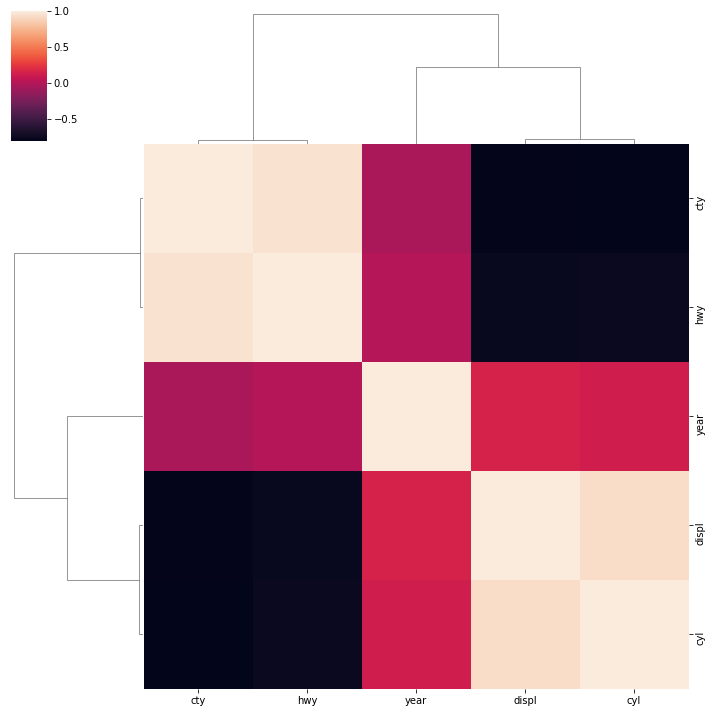

In [122]:
sns.clustermap(mpg_df.corr())

In [123]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [124]:
# summary stats
mpg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
displ,234.0,3.471795,1.291959,1.6,2.4,3.3,4.6,7.0
year,234.0,2003.500000,4.509646,1999.0,1999.0,2003.5,2008.0,2008.0
cyl,234.0,5.888889,1.611534,4.0,4.0,6.0,8.0,8.0
cty,234.0,16.858974,4.255946,9.0,14.0,17.0,19.0,35.0
hwy,234.0,23.440171,5.954643,12.0,18.0,24.0,27.0,44.0


In [125]:
## check for null
mpg_df.isna().any()

manufacturer    False
model           False
displ           False
year            False
cyl             False
trans           False
drv             False
cty             False
hwy             False
fl              False
class           False
dtype: bool

In [126]:
mpg_df['drv'] = mpg_df['drv'].astype(str)

In [127]:
mpg_df.drv.unique()

array(['f', '4', 'r'], dtype=object)

### Dummify the `drv` Variable
The `drv` feature is categorical. Use the pandas method to create dummy features and verify the result.

In [128]:
mpg_df_dummy = pd.get_dummies(mpg_df)

In [129]:
mpg_df_dummy.columns

Index(['displ', 'year', 'cyl', 'cty', 'hwy', 'manufacturer_audi',
       'manufacturer_chevrolet', 'manufacturer_dodge', 'manufacturer_ford',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_jeep',
       'manufacturer_land rover', 'manufacturer_lincoln',
       'manufacturer_mercury', 'manufacturer_nissan', 'manufacturer_pontiac',
       'manufacturer_subaru', 'manufacturer_toyota', 'manufacturer_volkswagen',
       'model_4runner 4wd', 'model_a4', 'model_a4 quattro', 'model_a6 quattro',
       'model_altima', 'model_c1500 suburban 2wd', 'model_camry',
       'model_camry solara', 'model_caravan 2wd', 'model_civic',
       'model_corolla', 'model_corvette', 'model_dakota pickup 4wd',
       'model_durango 4wd', 'model_expedition 2wd', 'model_explorer 4wd',
       'model_f150 pickup 4wd', 'model_forester awd',
       'model_grand cherokee 4wd', 'model_grand prix', 'model_gti',
       'model_impreza awd', 'model_jetta', 'model_k1500 tahoe 4wd',
       'model_land cruis

In [130]:
drv_dummy = mpg_df_dummy[['drv_4', 'drv_f', 'drv_r']]

In [131]:
print(drv_dummy)

     drv_4  drv_f  drv_r
0        0      1      0
1        0      1      0
2        0      1      0
3        0      1      0
4        0      1      0
..     ...    ...    ...
229      0      1      0
230      0      1      0
231      0      1      0
232      0      1      0
233      0      1      0

[234 rows x 3 columns]


### Assign Features `X` and Target `y`
You only need to keep the `displ` and dummy `drv` variable(s) here, as those are the only columns you'll be fitting your model on in the next section. The target is `hwy`.

In [132]:
X = mpg_df_dummy[['drv_4', 'drv_f', 'drv_r', 'displ']]

y = mpg_df_dummy['hwy']

In [133]:
print(X.shape)

(234, 4)


In [134]:
print(y.shape)

(234,)


### Instantiate a Linear Regression Model Object Predicting Highway MPG
Instantiate a `LinearRegression` object here.

In [135]:
lr = LinearRegression()

In [136]:
# split train/test 0.8/0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Evaluate Your Model

- Run five-fold cross-validation on your data.
  - Report the mean of the `mean_squared_error` across five folds (include the units the error is expressed in).
  - Report the mean R-squared value across five folds.

In [137]:
# set k fold
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [138]:
scores_mae = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=cv, n_jobs = -1)

In [139]:
# mean error
# mean absolute error
print(f'Cross Validated MAE: {scores_mae}')

Cross Validated MAE: [-2.36782709 -2.49632148 -2.41970583 -2.20233128 -2.19960987]


In [140]:
# mean squared error
scores_mse = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv=cv, n_jobs = -1)
print(f'Cross Validated MSE: {scores_mse}')

Cross Validated MSE: [-11.66922604 -11.05710552 -11.12145066  -7.91256722  -8.69186103]


In [141]:
# mean R^2
scores_r2 = cross_val_score(lr, X_train, y_train, scoring = 'r2', cv=cv, n_jobs = -1)

In [142]:
print(f'Cross Validated R-squared: {scores_r2}')

Cross Validated R-squared: [0.72410828 0.62563107 0.71626415 0.77980436 0.77630639]


## Part 2: Classification Using Logistic Regression, KNN & Others

This part of the project is an update to the Wisconsin Breast Cancer data set.

It will cover the following skills:

1. **Loading Data**
2. **Exploratory Data Analysis - numerical & visual & Data cleaning**
3. **Pre-processing & setting up a data lab via train-test split.**
4. Modeling creation
5. Hyperparameter Tuning & Cross-validation
6. Best Model Selection
7. Model Performance Analysis using appropriate metrics.
8. Comparison of two different methods and why use one over the other.
9. **Statistical Analysis using bootstrapping

### Load and Explore the Data
#### Load and verify the `breast-cancer` data
Load the data and verify it was loaded correctly. The data is located in this repo under the `data` directory. Note that the data comes in two parts the actual data and a separate file with column names. File names are listed below.

* Data - ```breast-cancer.csv```
* Field Names - ```field_names.txt```

You'll have to read in the Field Names and assign them as columns for the data frame. 

Use `f = open('name_path', 'r+')` to open the name file and `.readlines()` to grab the values. 

Here's a description of the data. 

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” - 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in a total of 30 features. So, for example, in addition to ```radius``` there is ```mean radius```, and ```radius std error```.

In [2]:
# load the data into a pandas dataframe and verify.
data_path = 'data/breast-cancer.csv'
name_path = 'data/field_names.txt'



In [3]:
# Load csv into dataframe (w/o header)
data_df = pd.read_csv(data_path)
#name_df = pd.read_csv(name_path)

#print(data_df.columns)
# Grab headers from file and read into a list
f = open(name_path, 'r+').readlines() 
f_2 = []

for col in f:
    f_2.append(col.replace('\n', ''))


# Add headers to dataframe and verify
data_df.columns = f_2
print(data_df)

           ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
0      842517         M        20.57            17.77        132.90   
1    84300903         M        19.69            21.25        130.00   
2    84348301         M        11.42            20.38         77.58   
3    84358402         M        20.29            14.34        135.10   
4      843786         M        12.45            15.70         82.57   
..        ...       ...          ...              ...           ...   
563    926424         M        21.56            22.39        142.00   
564    926682         M        20.13            28.25        131.20   
565    926954         M        16.60            28.08        108.30   
566    927241         M        20.60            29.33        140.10   
567     92751         B         7.76            24.54         47.92   

     texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
0          1326.0           0.08474        0.07864         0.08690   
1      

In [4]:
# Verify the data. Use transpose the result to make it easier to read.
data_df.T

,0,1,2,3,4,5,6,7,8,9,...,558,559,560,561,562,563,564,565,566,567
ID,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,845636,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,16.02,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
radius_sd_error,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,23.24,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
radius_worst,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,102.7,...,74.52,91.38,70.67,103.4,143.0,142.0,131.2,108.3,140.1,47.92
texture_mean,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9,797.8,...,403.5,600.4,386.0,716.9,1347.0,1479.0,1261.0,858.1,1265.0,181.0
texture_sd_error,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,0.08206,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
texture_worst,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,0.06669,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
perimeter_mean,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,0.03299,...,0.1112,0.04462,0.0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0.0
perimeter_sd_error,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,0.03323,...,0.04105,0.04304,0.0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0.0


### EDA

Throughout - provide brief comments indicating any interim findings, etc. (Be sure to use the features of Jupyter Notebooks appropriately.)

Apply the techniques of data exploration to quickly determine:
1. What does the data consists of: Identify the features and target, data types, etc.
2. how much data you have, is it balanced?
3. Generate summary statistics and create pertinent visualizations. **You MUST show at least one pertinent visualzation**.
4. Identify if there are any problems with the data and if any data cleaning steps are needed.
5. Look for relationships and interactions among features as appropriate.he Data

In [5]:
# Answers - create as many new cells as you need.
#What does the data consists of: Identify the features and target, data types, etc.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          568 non-null    int64  
 1   diagnosis                   568 non-null    object 
 2   radius_mean                 568 non-null    float64
 3   radius_sd_error             568 non-null    float64
 4   radius_worst                568 non-null    float64
 5   texture_mean                568 non-null    float64
 6   texture_sd_error            568 non-null    float64
 7   texture_worst               568 non-null    float64
 8   perimeter_mean              568 non-null    float64
 9   perimeter_sd_error          568 non-null    float64
 10  perimeter_worst             568 non-null    float64
 11  area_mean                   568 non-null    float64
 12  area_sd_error               568 non-null    float64
 13  area_worst                  568 non

In [6]:
data_df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [7]:
data_df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
## check for null
data_df.isna().any()

ID                            False
diagnosis                     False
radius_mean                   False
radius_sd_error               False
radius_worst                  False
texture_mean                  False
texture_sd_error              False
texture_worst                 False
perimeter_mean                False
perimeter_sd_error            False
perimeter_worst               False
area_mean                     False
area_sd_error                 False
area_worst                    False
smoothness_mean               False
smoothness_sd_error           False
smoothness_worst              False
compactness_mean              False
compactness_sd_error          False
compactness_worst             False
concavity_mean                False
concavity_sd_error            False
concavity_worst               False
concave_points_mean           False
concave_points_sd_error       False
concave_points_worst          False
symmetry_mean                 False
symmetry_sd_error           

In [9]:
#target - diagnosis, malignant or benign 
y = data_df['diagnosis'].map({'M':1, 'B': 0})
print(y)
lst = ['ID', 'diagnosis']

#features
x = data_df.drop(lst, axis = 1) 
#x.head()

0      1
1      1
2      1
3      1
4      1
      ..
563    1
564    1
565    1
566    1
567    0
Name: diagnosis, Length: 568, dtype: int64


In [10]:
#how much data you have, is it balanced
#data_df.shape
data_df.groupby(['diagnosis']).nunique()

# notes: diagnosis split close to 50-50, balanced

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,284,311,338,341,326,345,336,337,298,...,274,336,338,343,278,334,337,303,324,347
M,211,196,198,190,204,189,203,205,208,187,...,195,199,191,205,190,203,207,198,204,204


In [11]:
# Generate summary statistics and create pertinent visualizations. You MUST show at least one pertinent visualzation.

#summary 
print(data_df.describe())

                 ID  radius_mean  radius_sd_error  radius_worst  texture_mean  \
count  5.680000e+02   568.000000       568.000000    568.000000    568.000000   
mean   3.042382e+07    14.120491        19.305335     91.914754    654.279754   
std    1.251246e+08     3.523416         4.288506     24.285848    351.923751   
min    8.670000e+03     6.981000         9.710000     43.790000    143.500000   
25%    8.692225e+05    11.697500        16.177500     75.135000    420.175000   
50%    9.061570e+05    13.355000        18.855000     86.210000    548.750000   
75%    8.825022e+06    15.780000        21.802500    103.875000    782.625000   
max    9.113205e+08    28.110000        39.280000    188.500000   2501.000000   

       texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  \
count        568.000000     568.000000      568.000000          568.000000   
mean           0.096321       0.104036        0.088427            0.048746   
std            0.014046       0.0523

<AxesSubplot:xlabel='radius_mean', ylabel='diagnosis'>

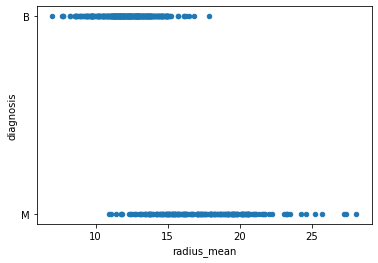

In [12]:
# data visualization 
#1
data_df.plot(kind = "scatter", x = "radius_mean", y= "diagnosis")

#notes: radius_mean is higher for M 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'radius_sd_error'),
  Text(2, 0, 'radius_worst'),
  Text(3, 0, 'texture_mean'),
  Text(4, 0, 'texture_sd_error'),
  Text(5, 0, 'texture_worst'),
  Text(6, 0, 'perimeter_mean'),
  Text(7, 0, 'perimeter_sd_error'),
  Text(8, 0, 'perimeter_worst'),
  Text(9, 0, 'area_mean')])

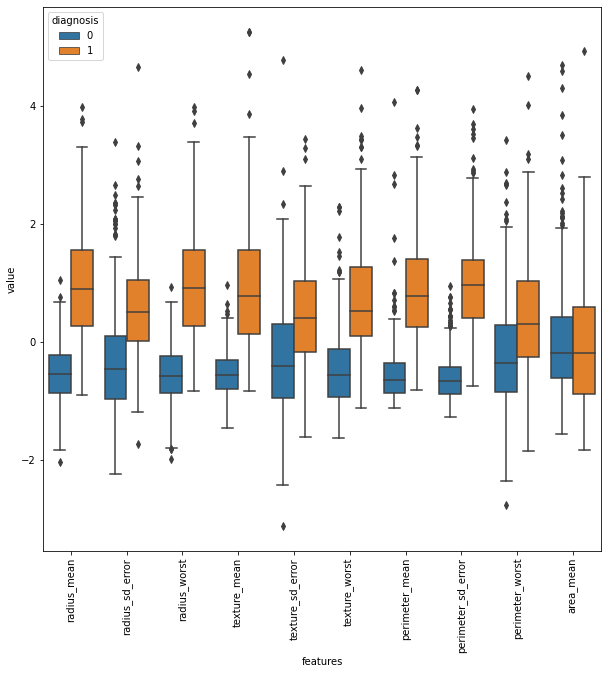

In [13]:
# data visualization 
#2
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
#notes: mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

<AxesSubplot:>

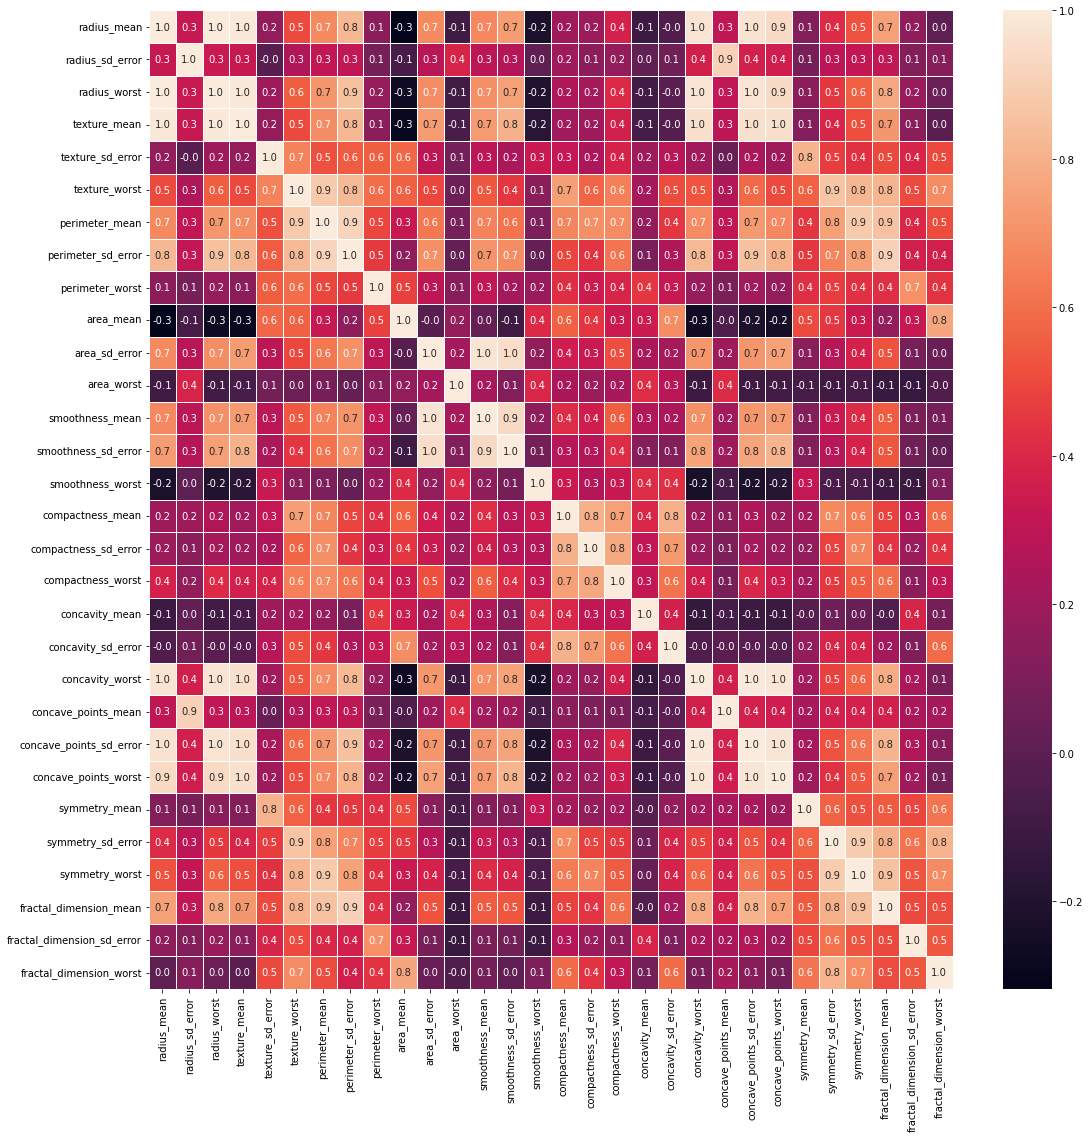

In [14]:
# Identify if there are any problems with the data and if any data cleaning steps are needed.
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [15]:
# check for null
data_df.isnull().sum()
# note: no null values in data set

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

In [16]:
# do we need to normalize?
data_df.describe() #mean values ranges from 0.16 to 2500 --yes 

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
data_df.columns

Index(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
# isolate input variables to use,
drop_lst1 = ['perimeter_mean','radius_mean','compactness_mean','concave_points_mean','radius_sd_error','perimeter_sd_error','radius_worst','perimeter_worst','compactness_worst','concave_points_worst','compactness_sd_error','concave_points_sd_error','texture_worst','area_worst']

x_copy = x.drop(drop_lst1, axis = 1)
x_copy.head()


,texture_mean,texture_sd_error,area_mean,area_sd_error,smoothness_mean,smoothness_sd_error,smoothness_worst,concavity_mean,concavity_sd_error,concavity_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1326.0,0.08474,0.05667,0.5435,3.398,74.08,0.005225,0.01389,0.003532,24.99,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1203.0,0.10960,0.05999,0.7456,4.585,94.03,0.006150,0.02250,0.004571,23.57,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,386.1,0.14250,0.09744,0.4956,3.445,27.23,0.009110,0.05963,0.009208,14.91,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1297.0,0.10030,0.05883,0.7572,5.438,94.44,0.011490,0.01756,0.005115,22.54,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,477.1,0.12780,0.07613,0.3345,2.217,27.19,0.007510,0.02165,0.005082,15.47,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


### Prepare Your `X`, `y` Matrices
Construct an `X` and `y` matrices from the data. Be sure to identify the appropriate target.

In [19]:
# Answer
#target - diagnosis, malignant or benign 


#features
x_copy.columns

Index(['texture_mean', 'texture_sd_error', 'area_mean', 'area_sd_error',
       'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst',
       'concavity_mean', 'concavity_sd_error', 'concavity_worst',
       'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst',
       'fractal_dimension_mean', 'fractal_dimension_sd_error',
       'fractal_dimension_worst'],
      dtype='object')

### Preprocessing and set up our modeling environment

In this section you'll work on building and evaluating a model for the breast cancer data. Use visualizations where needed.

- Pre-processing (scale the data) & setting up a data lab via train-test split.
- Modeling creation & tuning w/ cross-validation using 5 folds.
- Best Model Selection & training
    - Find the best $k$
    - Train with the best $k$
    - Create a baseline model
- Evaluate model performance using appropriate metrics.
    - Make predictions with the best model.
    - Evaluate the results, including comparing to the baseline.
- Build 1 more model and compare them.
- **Optional** Perform statistical analysis using bootstrapping. 


In [20]:
#Pre-processing (scale the data) & setting up a data lab via train-test split.
X_train, X_test, y_train, y_test = train_test_split(x_copy, y, test_size = 0.2, random_state = 99)
pd.DataFrame(X_train).describe()

,texture_mean,texture_sd_error,area_mean,area_sd_error,smoothness_mean,smoothness_sd_error,smoothness_worst,concavity_mean,concavity_sd_error,concavity_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,655.871806,0.096142,0.062579,0.402231,2.852505,40.192293,0.007061,0.020517,0.003780,16.245084,0.131839,0.251786,0.270976,0.114099,0.288933,0.083493
std,349.246969,0.013947,0.006769,0.282225,2.076441,47.356369,0.003065,0.008366,0.002643,4.715015,0.022017,0.155438,0.209974,0.065384,0.059832,0.017695
min,170.400000,0.052630,0.049960,0.111500,0.757000,7.228000,0.002667,0.007882,0.000895,8.678000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,427.475000,0.085550,0.057665,0.232675,1.612500,17.850000,0.005161,0.014943,0.002249,13.075000,0.115925,0.141925,0.116475,0.064943,0.251000,0.071462
50%,552.950000,0.096035,0.061360,0.319400,2.286500,24.610000,0.006391,0.018695,0.003103,14.975000,0.131300,0.214850,0.229850,0.098365,0.280650,0.080075
75%,782.675000,0.105400,0.065818,0.467925,3.216500,43.882500,0.008079,0.023045,0.004488,18.465000,0.144975,0.333600,0.378275,0.161200,0.317350,0.090927
max,2501.000000,0.144700,0.095750,2.873000,21.980000,542.200000,0.031130,0.078950,0.029840,36.040000,0.218400,1.058000,1.252000,0.291000,0.577400,0.207500


In [21]:
# what is baseline? (where diagnosis = M
baseline = data_df.diagnosis[data_df.diagnosis == 'M'].count() / data_df.diagnosis.count()
print(baseline)

0.3714788732394366


In [23]:
#Modeling creation & tuning w/ cross-validation using 5 folds.
# Calculate testing error.
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)



# Make predictions
y_pred_class = knn.predict(X_test)

# compute the accuracy
acc = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {acc}')

Accuracy: 0.9035087719298246


In [24]:
#Best Model Selection & training
#Find the best  𝑘 
#Train with the best  𝑘 
#Create a baseline model

# a loop to try a range of k values
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# loop through the k's
for k in k_range:
    
    #instantiate with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # get the cross-val scores
    scores = cross_val_score(knn, x_copy, y, cv=5, scoring='accuracy')
    
    # append the mean of the cross-validation scores to our list of scores
    k_scores.append(scores.mean())
    
print('Average Scores for each K\n')
print(k_scores)

Average Scores for each K

[0.8381151995031827, 0.8681105418413291, 0.8697873001086787, 0.8891942244993013, 0.8927340475081509, 0.8962428194379755, 0.8927495730476634, 0.8962738705170004, 0.8945039590125756, 0.8927650985871759, 0.896289396056513, 0.8927650985871759, 0.8927650985871759, 0.8910107126222636, 0.8927650985871759, 0.8910107126222636, 0.8945194845520883, 0.889240801117839, 0.8927806241266885, 0.8927650985871759, 0.8927650985871759, 0.8945194845520883, 0.8945194845520883, 0.8945194845520883, 0.896289396056513, 0.8927650985871759, 0.8945350100916007, 0.8945350100916007, 0.8945350100916007, 0.8927650985871759]


In [25]:
k_dict = dict(zip(k_range, k_scores))
k_dict

{1: 0.8381151995031827,
 2: 0.8681105418413291,
 3: 0.8697873001086787,
 4: 0.8891942244993013,
 5: 0.8927340475081509,
 6: 0.8962428194379755,
 7: 0.8927495730476634,
 8: 0.8962738705170004,
 9: 0.8945039590125756,
 10: 0.8927650985871759,
 11: 0.896289396056513,
 12: 0.8927650985871759,
 13: 0.8927650985871759,
 14: 0.8910107126222636,
 15: 0.8927650985871759,
 16: 0.8910107126222636,
 17: 0.8945194845520883,
 18: 0.889240801117839,
 19: 0.8927806241266885,
 20: 0.8927650985871759,
 21: 0.8927650985871759,
 22: 0.8945194845520883,
 23: 0.8945194845520883,
 24: 0.8945194845520883,
 25: 0.896289396056513,
 26: 0.8927650985871759,
 27: 0.8945350100916007,
 28: 0.8945350100916007,
 29: 0.8945350100916007,
 30: 0.8927650985871759}

In [26]:
max_k = max(k_dict, key=k_dict.get)

print(f'Maximum Accuracy k: {max_k}')

Maximum Accuracy k: 11


In [27]:
#try gridsearch 

param_grid = dict(n_neighbors=list(k_range))
param_grid

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [28]:
# instantiate a GridSearchCV
clf = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
print(type(clf))
clf

<class 'sklearn.model_selection._search.GridSearchCV'>


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, scoring='accuracy')

In [29]:
clf.fit(x_copy, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, scoring='accuracy')

In [30]:
clf.cv_results_

{'mean_fit_time': array([0.00249305, 0.00286922, 0.00173655, 0.00170898, 0.0016871 ,
        0.00172257, 0.00171428, 0.00171585, 0.00169168, 0.00169702,
        0.00173054, 0.00220752, 0.00196452, 0.002074  , 0.00227828,
        0.00206509, 0.0021163 , 0.00198951, 0.00308437, 0.00185037,
        0.00174766, 0.00173874, 0.00169983, 0.00178165, 0.0017405 ,
        0.0017385 , 0.00179968, 0.00172472, 0.00173883, 0.00173182]),
 'std_fit_time': array([4.59661142e-04, 1.44534284e-03, 4.90323560e-05, 6.49698284e-05,
        4.43313431e-05, 4.85653437e-05, 3.54567467e-05, 2.79881072e-05,
        1.10648827e-05, 2.92291454e-05, 2.99591136e-05, 1.06160017e-03,
        1.31920893e-04, 4.72838660e-04, 6.48471106e-04, 2.87619723e-04,
        7.11691936e-04, 2.88052611e-04, 1.15048854e-03, 1.01989772e-04,
        1.23310126e-05, 3.87247556e-05, 3.54305090e-05, 1.09845150e-04,
        2.76579528e-05, 5.28008398e-05, 1.66054568e-04, 2.72319526e-05,
        2.58674380e-05, 6.45055819e-05]),
 'mean_scor

In [31]:
# we can make this output easier to manage
mean_scores = clf.cv_results_['mean_test_score']
params = clf.cv_results_['params']

# Match up the k's and corresponding scores
knn_score = list(zip(mean_scores, params))

# print out the best one - we sorted this in descending order
print(f'Best K and accuracy: {sorted(knn_score, key=lambda x: x[0], reverse=True)[0]}')

Best K and accuracy: (0.896289396056513, {'n_neighbors': 11})


In [32]:
# train with optimal k 
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')

# fit
knn.fit(x_copy, y)
        

scores_df= cross_val_score(knn, x_copy, y, cv=5, scoring='accuracy')

print(f'Cross Val Scores:\n{scores_df}')

# Get the mean scores
print()
print(f'Mean Score: {scores_df.mean()}')

Cross Val Scores:
[0.84210526 0.85964912 0.89473684 0.95575221 0.92920354]

Mean Score: 0.896289396056513


In [34]:
# Calculate testing error.
KNN = KNeighborsClassifier(n_neighbors=11)
KNN.fit(X_train_scaled, y_train)

y_pred_class = KNN.predict(X_test_scaled)
testing_accuracy = accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(f'Testing error: {testing_error}')

NameError: name 'X_train_scaled' is not defined

In [35]:
#measurement of accuracy = (TP + TN) / (TP+TN+FP+FN), standard measurement for classifier model 
metrics.accuracy_score(y_test, y_pred_class)

0.9035087719298246

In [36]:
# measure prediction of positive events that are actually positive = TP / (TP + FP)
metrics.precision_score(y_test, y_pred_class)

0.9047619047619048

In [41]:
#scale data
scaler = StandardScaler()
X_copy_scaled = scaler.fit_transform(x_copy)

# train transform
X_train_scaled = scaler.fit_transform(X_train)

# test transform
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02
mean,-6.455922e-17,1.878087e-16,8.823094e-16,9.219253e-17,1.046642e-16,-1.956340e-17,-4.303948e-17,-2.269355e-16,-5.869020e-17,1.530836e-16,8.999165e-17,2.425862e-16,1.271621e-16,-9.781701e-17,-2.269355e-16,-3.853990e-16
std,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00
min,-1.391586e+00,-3.123332e+00,-1.866421e+00,-1.031276e+00,-1.010294e+00,-6.968578e-01,-1.434852e+00,-1.511854e+00,-1.093111e+00,-1.606661e+00,-2.300255e+00,-1.400593e+00,-1.291944e+00,-1.746995e+00,-2.215875e+00,-1.609763e+00
25%,-6.546908e-01,-7.603146e-01,-7.268450e-01,-6.014460e-01,-5.978366e-01,-4.723111e-01,-6.204388e-01,-6.670189e-01,-5.802736e-01,-6.730796e-01,-7.236056e-01,-7.075604e-01,-7.366212e-01,-7.526467e-01,-6.346972e-01,-6.806481e-01
50%,-2.950214e-01,-7.695069e-03,-1.803511e-01,-2.938163e-01,-2.728848e-01,-3.294062e-01,-2.186616e-01,-2.180075e-01,-2.563641e-01,-2.696672e-01,-2.451439e-02,-2.378851e-01,-1.960784e-01,-2.409075e-01,-1.385922e-01,-1.933894e-01
75%,3.634765e-01,6.645302e-01,4.789171e-01,2.330294e-01,1.754910e-01,7.801016e-02,3.326901e-01,3.024987e-01,2.681419e-01,4.713379e-01,5.972789e-01,5.269273e-01,5.115738e-01,7.211728e-01,4.754737e-01,4.205990e-01
max,5.288990e+00,3.485507e+00,4.905961e+00,8.764276e+00,9.221833e+00,1.061233e+01,7.860645e+00,6.991901e+00,9.872531e+00,4.202903e+00,3.935866e+00,5.192444e+00,4.677270e+00,2.708569e+00,4.826641e+00,7.015776e+00


In [42]:
# Calculate testing error.
KNN = KNeighborsClassifier(n_neighbors=11)
KNN.fit(X_train_scaled, y_train)

y_pred_class = KNN.predict(X_test_scaled)
testing_accuracy = accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(f'Testing error: {testing_error}')

Testing error: 0.03508771929824561


### Part 3: Try at least one other method.

Choose one of the following methods and build a model to compare to your earlier results.

1. Logistic Regression
2. Decision Tree
3. Random Forest

Repeat your analysis using one of the above methods and evaluate your results. For a conclusion you'll select which model you would put into production and explain why.

In [39]:
#try random forest
model = DecisionTreeClassifier()

In [40]:
#fit 
model.fit(X_train, y_train)

#evaluate
model.score(X_test, y_test)

0.956140350877193

### Optional: Statistical Significance and Bootstrapped Data

Here you'll compute the mean and median for the ```smoothness_mean``` grouped by diagnosis (benign vs malignant). You should end up with a mean smoothness for benign tumors and mean smoothness for malignant tumors.

Is there a difference in these values? If so, is that difference statistically significant?

Do the following:
1. Create a visualization to compare ```smoothness_mean``` by diagnosis.
2. Determine if the results are statistically significant.
    1. Define a null and alternative hypothesis. Briefly state them.
    2. Write a function to generate bootstrap samples.
    3. Draw samples from the bootstrapped data and compute the statistics for those samples. Be sure to draw samples of the same size as the original data.
    4. Compute a p-value
3. What conclusion can you reach. Write a brief statement.

_Hint_: You can use Python's ```resample``` method or pandas ```.sample()``` method.



In [353]:
# instantiate and fit
model = DecisionTreeClassifier()

#Instantiate:
bagging = BaggingClassifier(base_estimator = model,
                            n_estimators = 100, 
                            random_state = 7)

# fit the bagging classifier
bagging.fit(X_train, y_train)

# score the bagging classifier
bagging.score(X_test, y_test)

0.9436619718309859

In [ ]:
# conclusion: based on the accuracy score, the Decision Tree model has a higher accuracy score of 0.94 (vs. 0.90), thus I will pick the Decision Tree.